# Example Plots for timeline analysis

In [1]:
from plotting import *

## Generate milliseconds timeline

In [2]:
!cd ../generateTimeline/ && go run ./generateTimeline.go \
    -tracePath ../../ \
    -outputFile millisecond_timeline.csv \
    -duration 30

INFO[0000] Parsing function memory trace: ../..//memory.csv 
INFO[0000] Traces contain the following 50 functions:   
INFO[0000] Generated Load, Building timeline            


In [3]:
timeline = pd.read_csv("../generateTimeline/millisecond_timeline.csv")

In [4]:
timeline.head()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
0,0,19,3204,4305,1661,2081
1,1,19,3204,4305,1661,2081
2,2,19,3204,4305,1661,2081
3,3,19,3204,4305,1661,2081
4,4,19,3204,4305,1661,2081


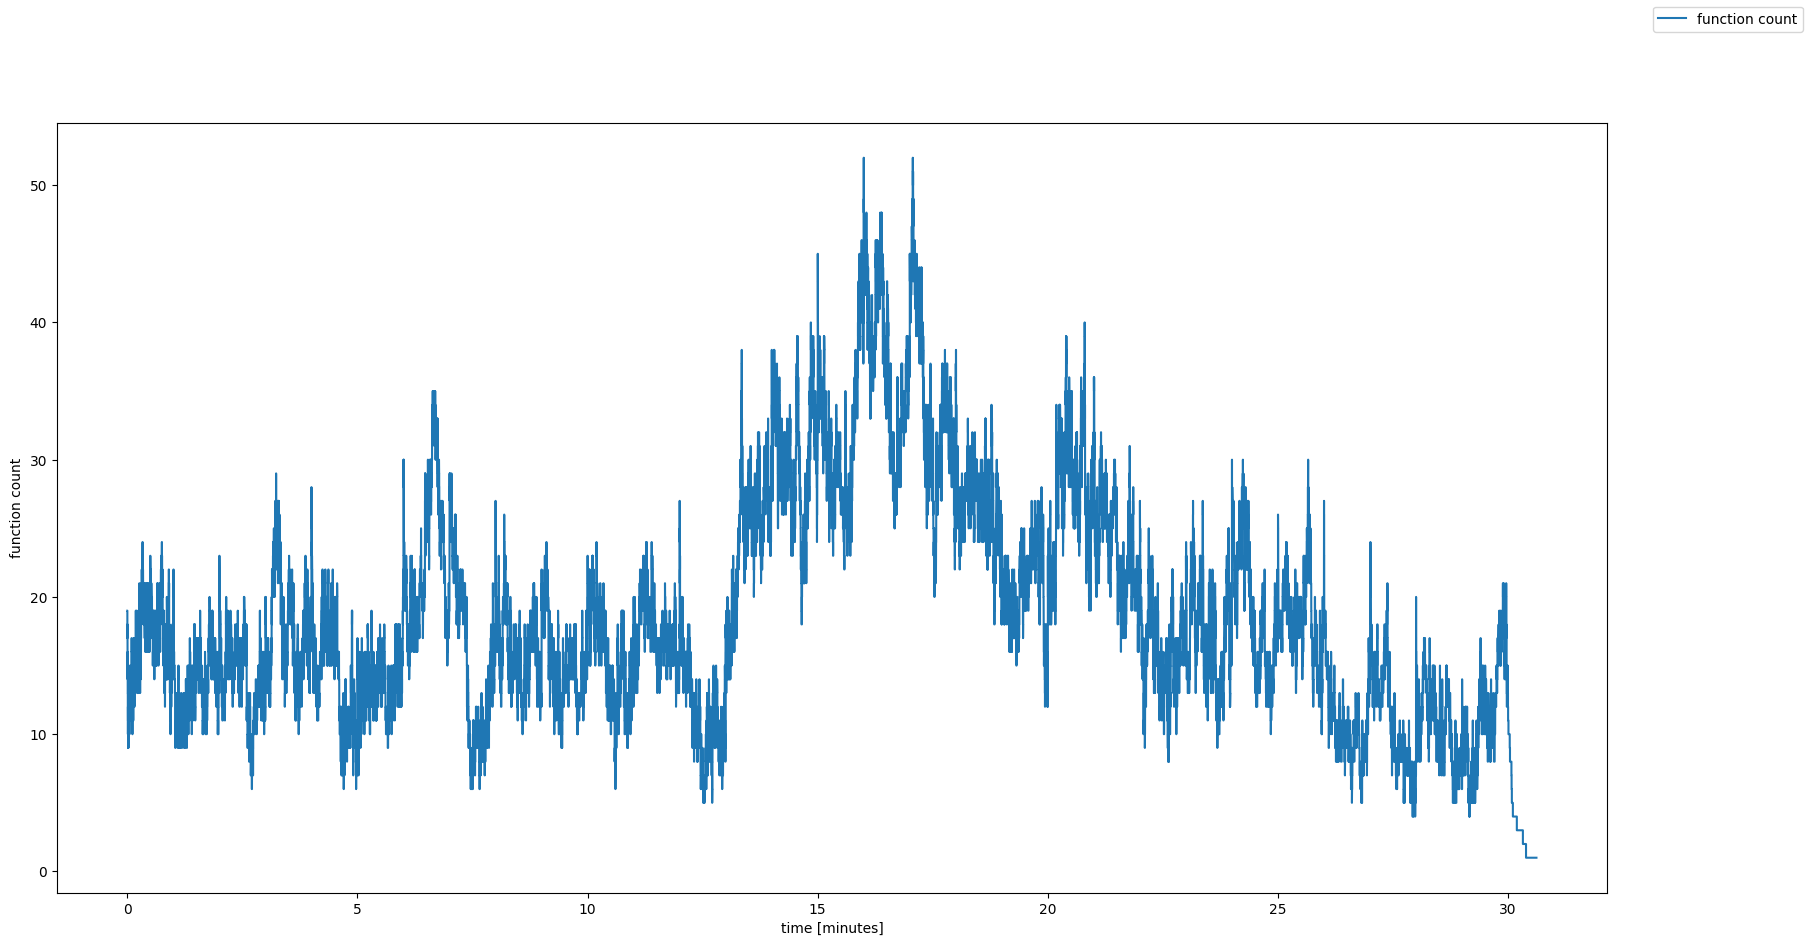

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
plot_fnc_cnt_per_millisecond(timeline, ax, "minutes")
fig.legend()
plt.show()


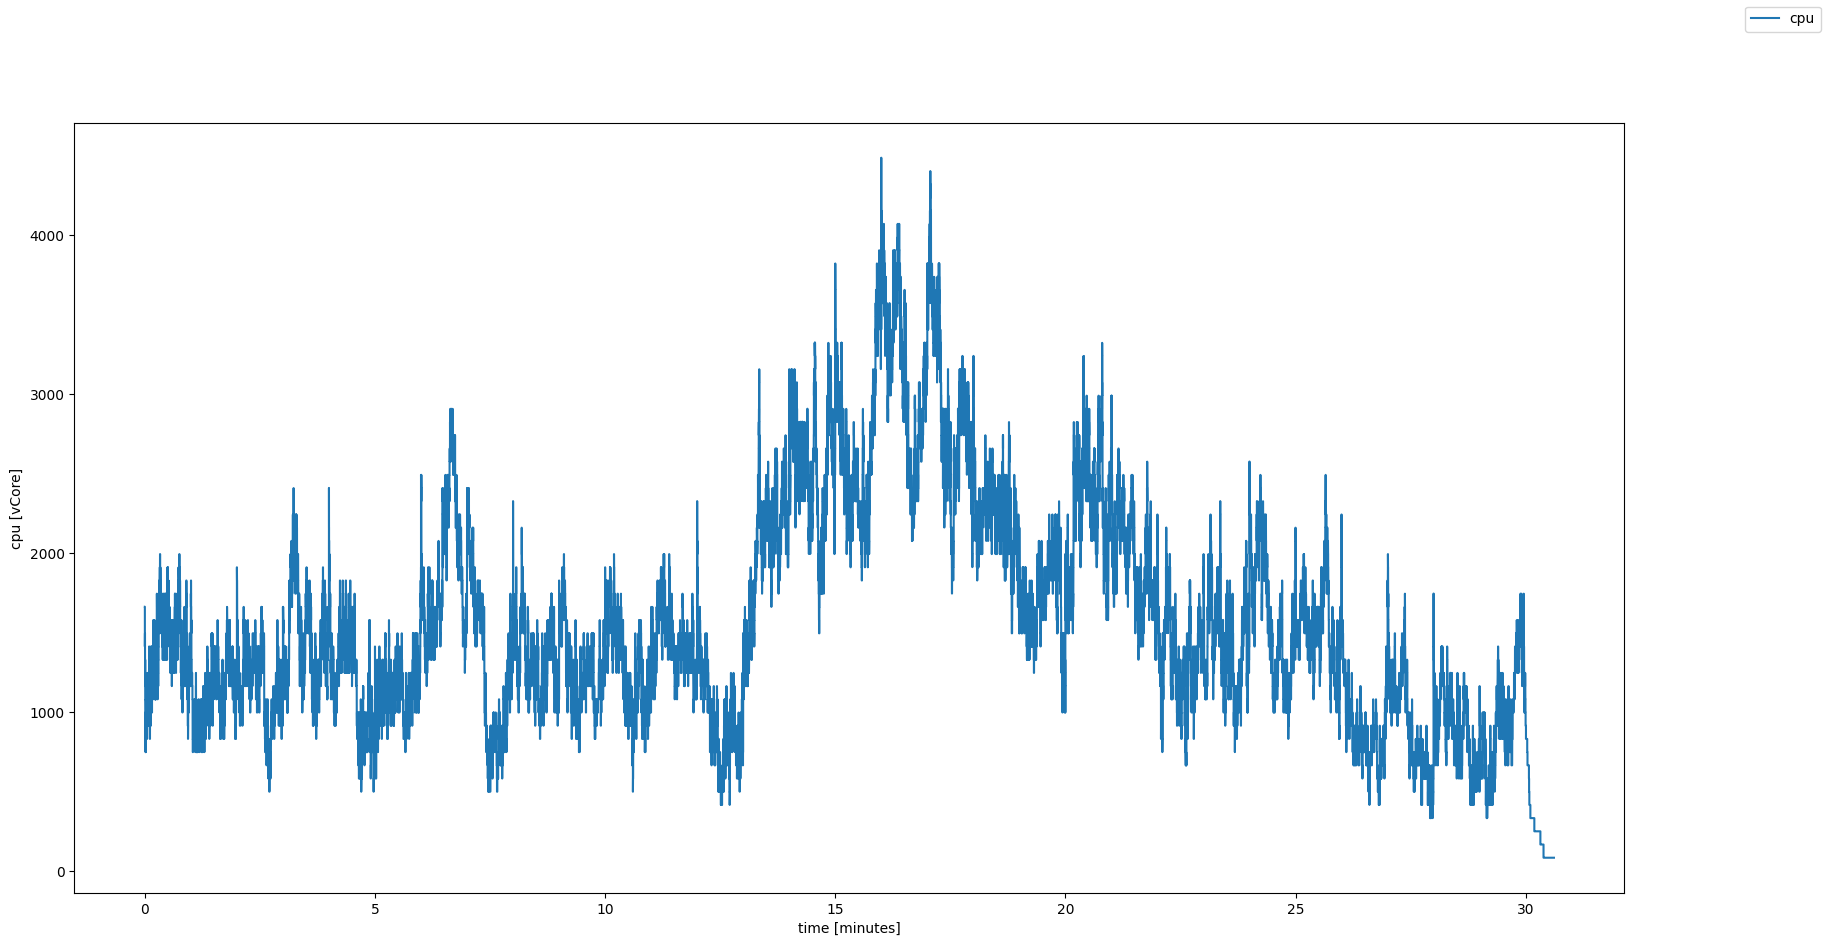

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
plot_cpu_per_millisecond(timeline, ax, "minutes")
fig.legend()
plt.show()


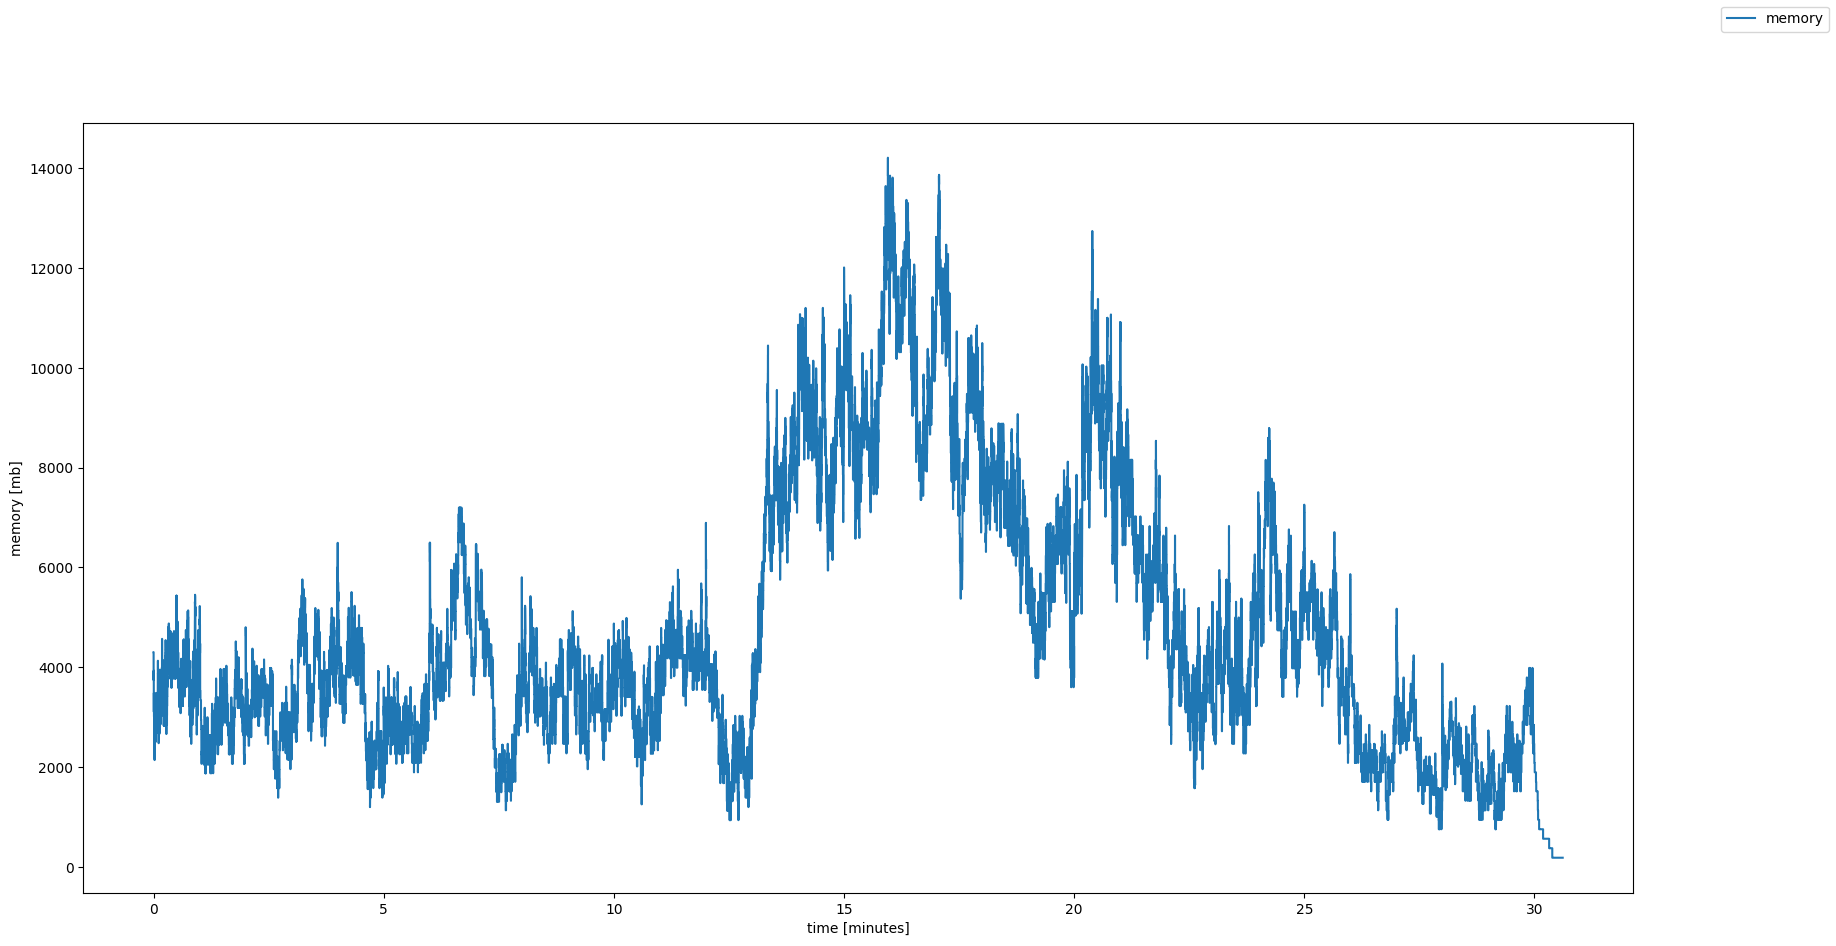

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
plot_memory_per_millisecond(timeline, ax, "minutes")
fig.legend()
plt.show()


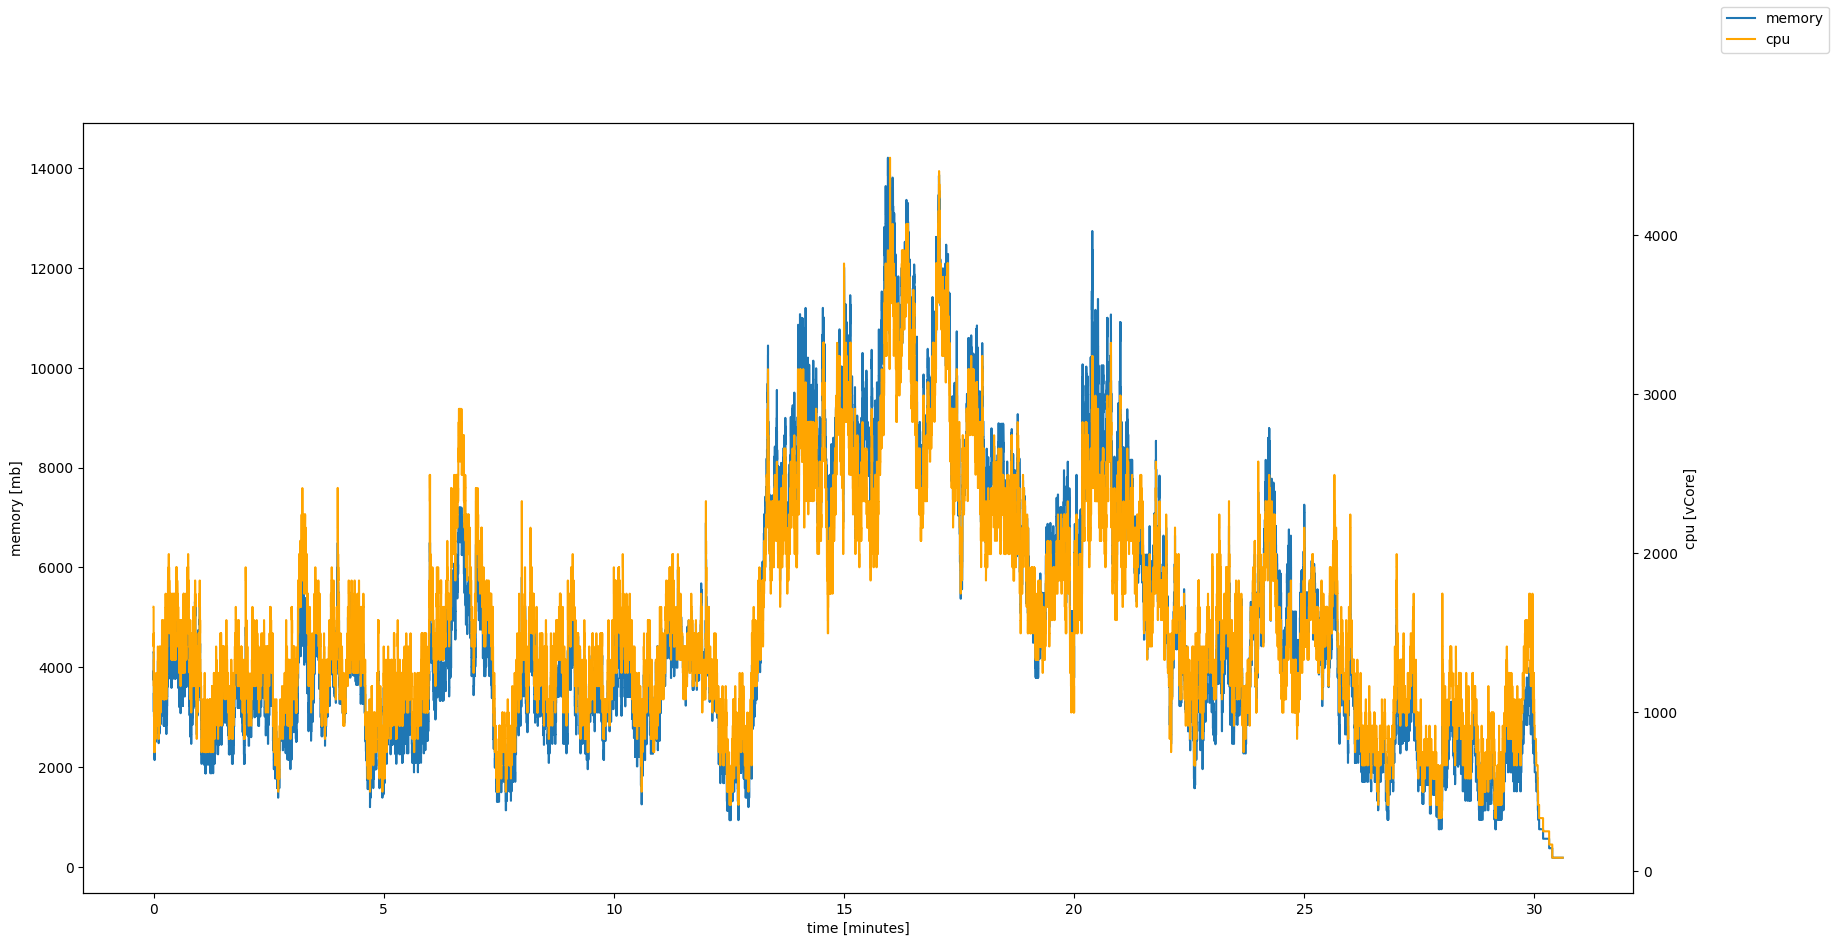

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
plot_memory_per_millisecond(timeline, ax, "minutes")
ax2 = ax.twinx()
plot_cpu_per_millisecond(timeline, ax2, "minutes")
ax2.get_lines()[0].set_color("orange")
fig.legend()
plt.show()


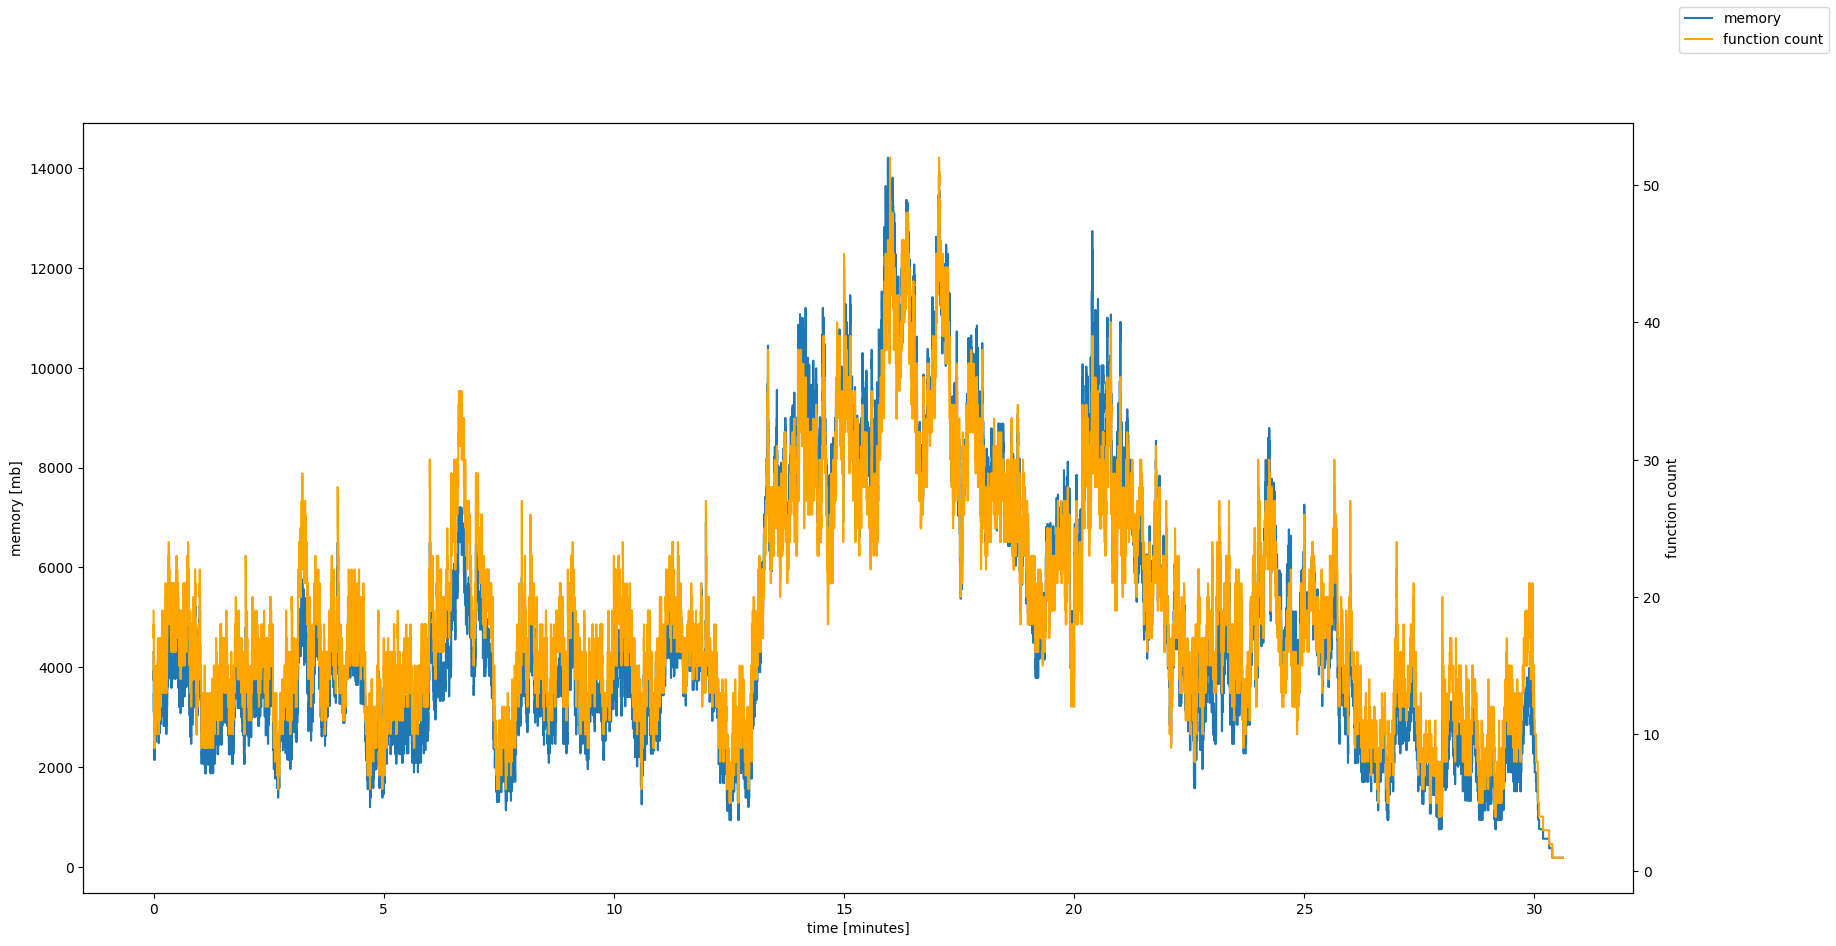

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
plot_memory_per_millisecond(timeline, ax, "minutes")
ax2 = ax.twinx()
plot_fnc_cnt_per_millisecond(timeline, ax2, "minutes")
ax2.get_lines()[0].set_color("orange")
fig.legend()
plt.show()


# Generate 1 day of minute timeline

In [9]:
!cd ../generateTimeline/ && go run ./generateTimeline.go \
    -tracePath ../../ \
    -outputFile minute_timeline.csv \
    -duration 1440 \
    -scale minute

INFO[0000] Parsing function memory trace: ../..//memory.csv 
INFO[0000] Traces contain the following 50 functions:   


In [10]:
min_timeline = read_minute_scale_timeline("../generateTimeline/minute_timeline.csv")

In [11]:
min_timeline.head()

,minute,avgRuntime,avgMemory,avgCpu,avgMaxMemory,avgMaxCpu
0,0,1.279442,0.053260,0.030545,0.077956,0.034493
1,1,0.991709,0.040290,0.023323,0.058027,0.025003
2,2,1.056331,0.038250,0.022244,0.053974,0.023252
3,3,1.319285,0.049179,0.028387,0.071225,0.030823
4,4,0.988995,0.042000,0.024237,0.060494,0.026169


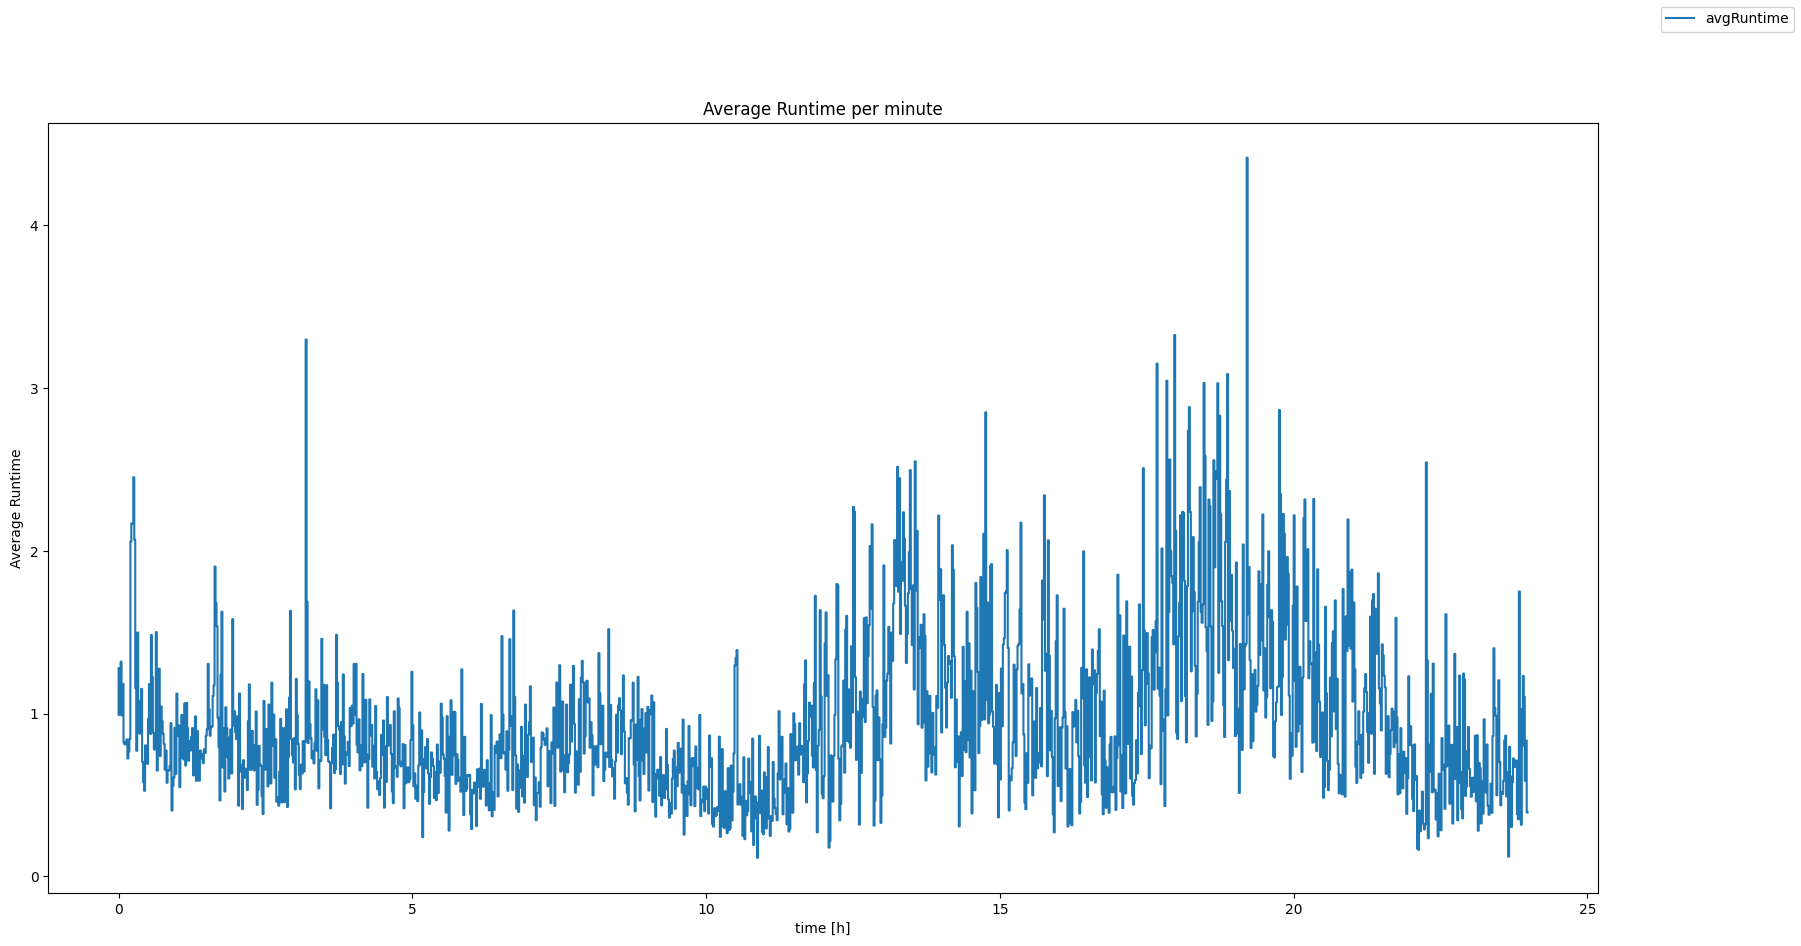

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
plot_avg_runtime_per_min(min_timeline, ax)
fig.legend()
plt.show()


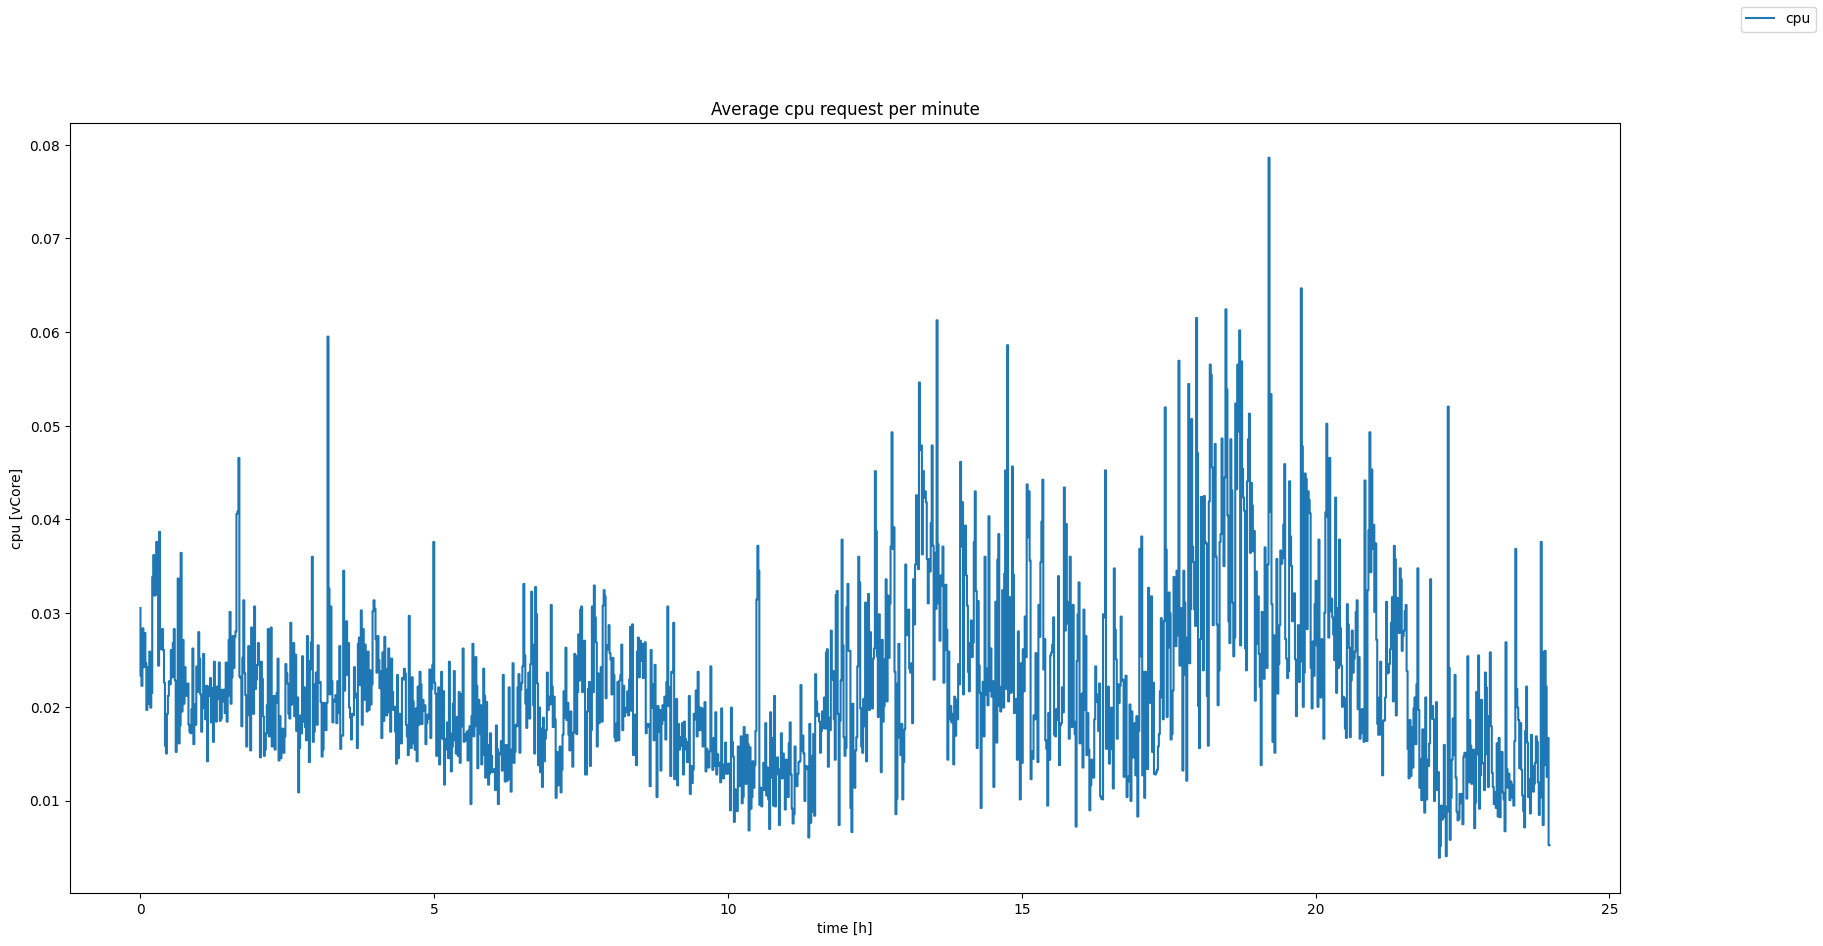

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
plot_avg_cpu_per_min(min_timeline, ax)
fig.legend()
plt.show()


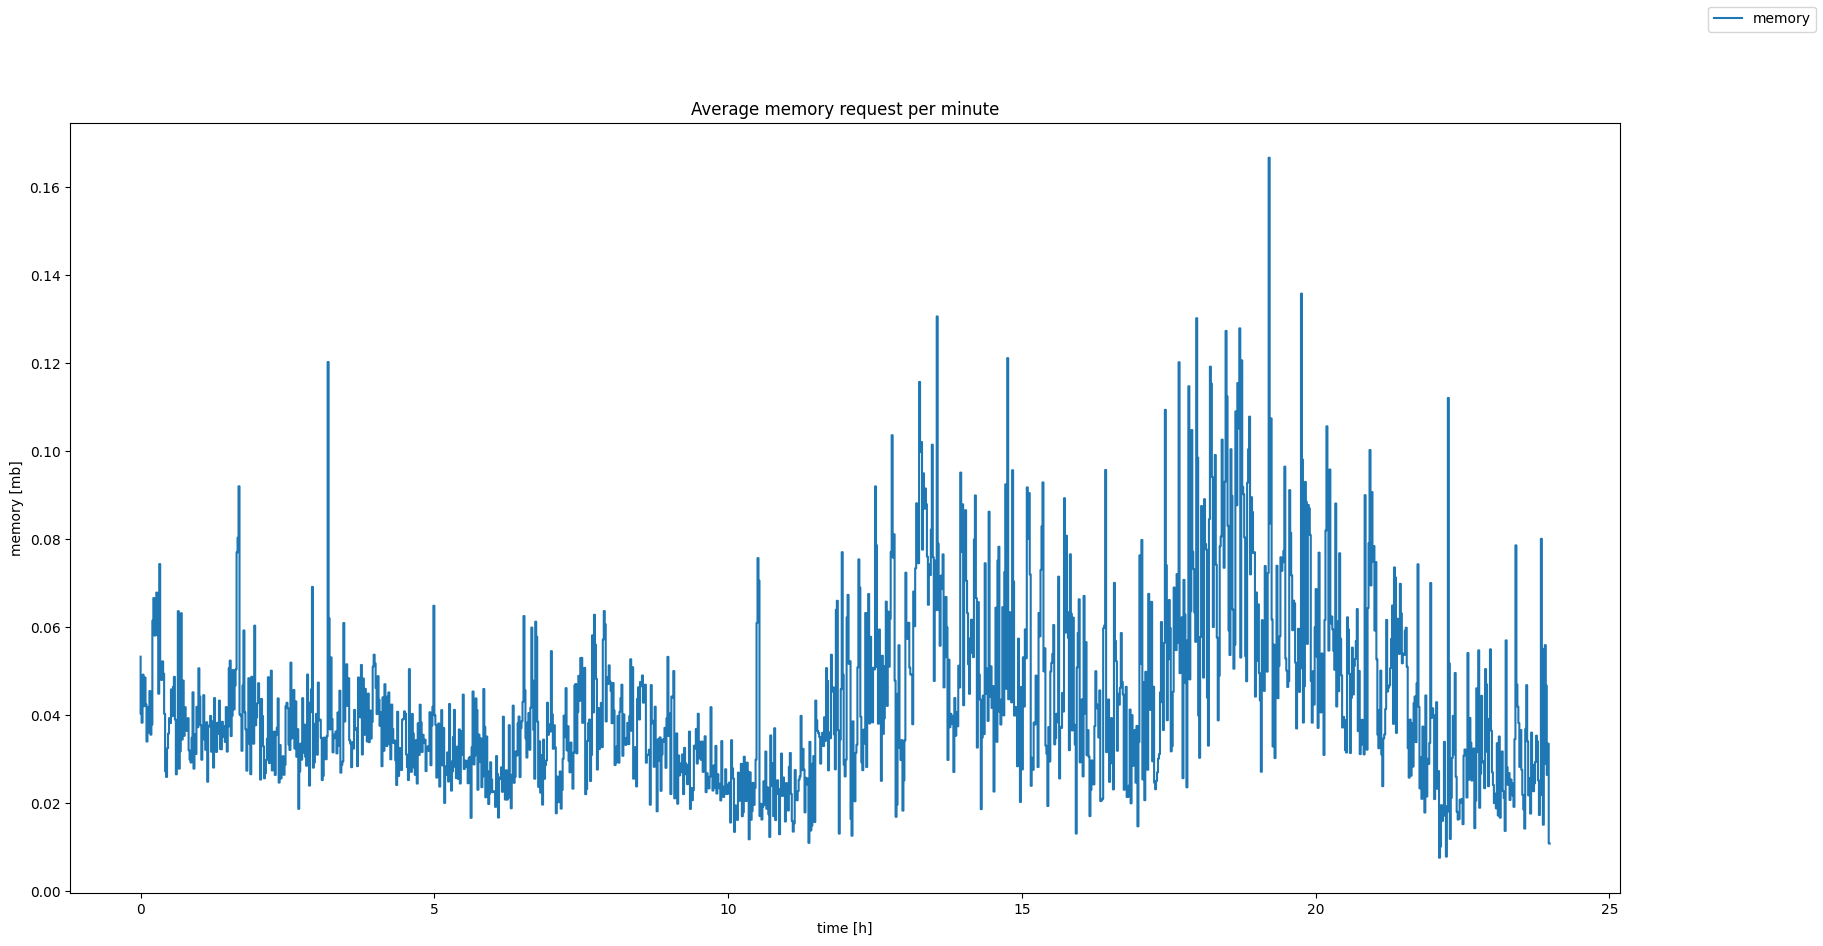

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
plot_avg_memory_per_min(min_timeline, ax)
fig.legend()
plt.show()


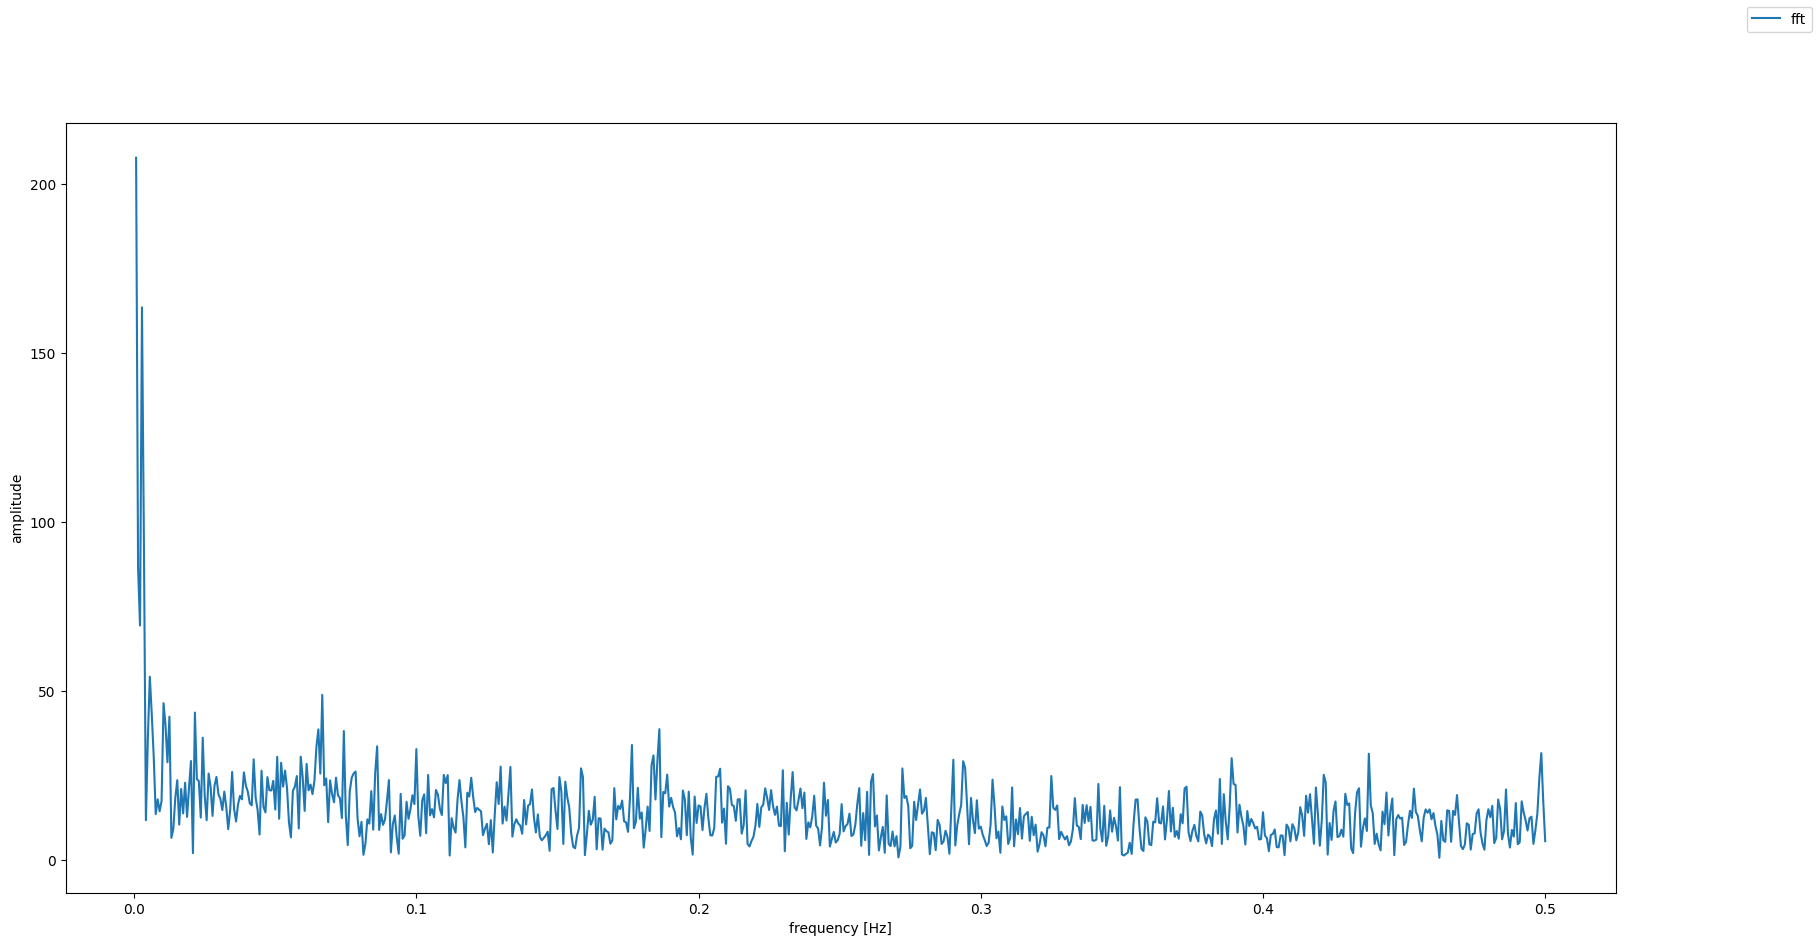

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
plot_fourier_transform(min_timeline["avgRuntime"], ax)
fig.legend()
plt.show()


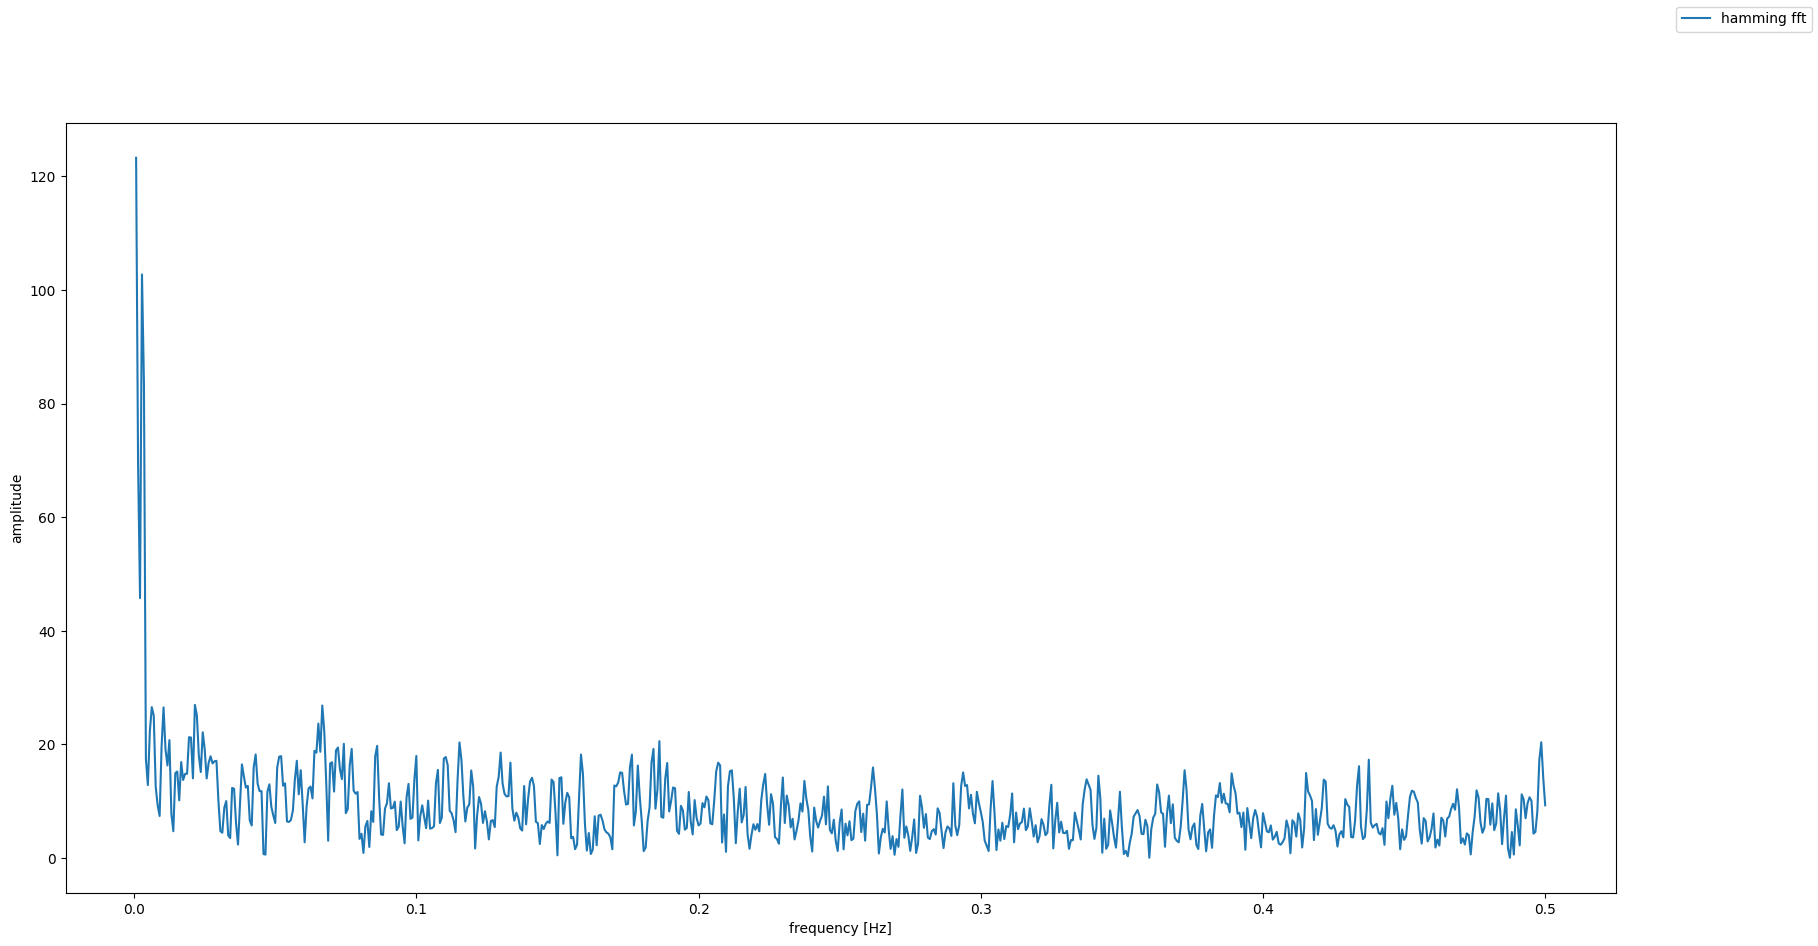

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
plot_windowed_fourier_transform(min_timeline["avgRuntime"], ax, "hamming")
fig.legend()
plt.show()


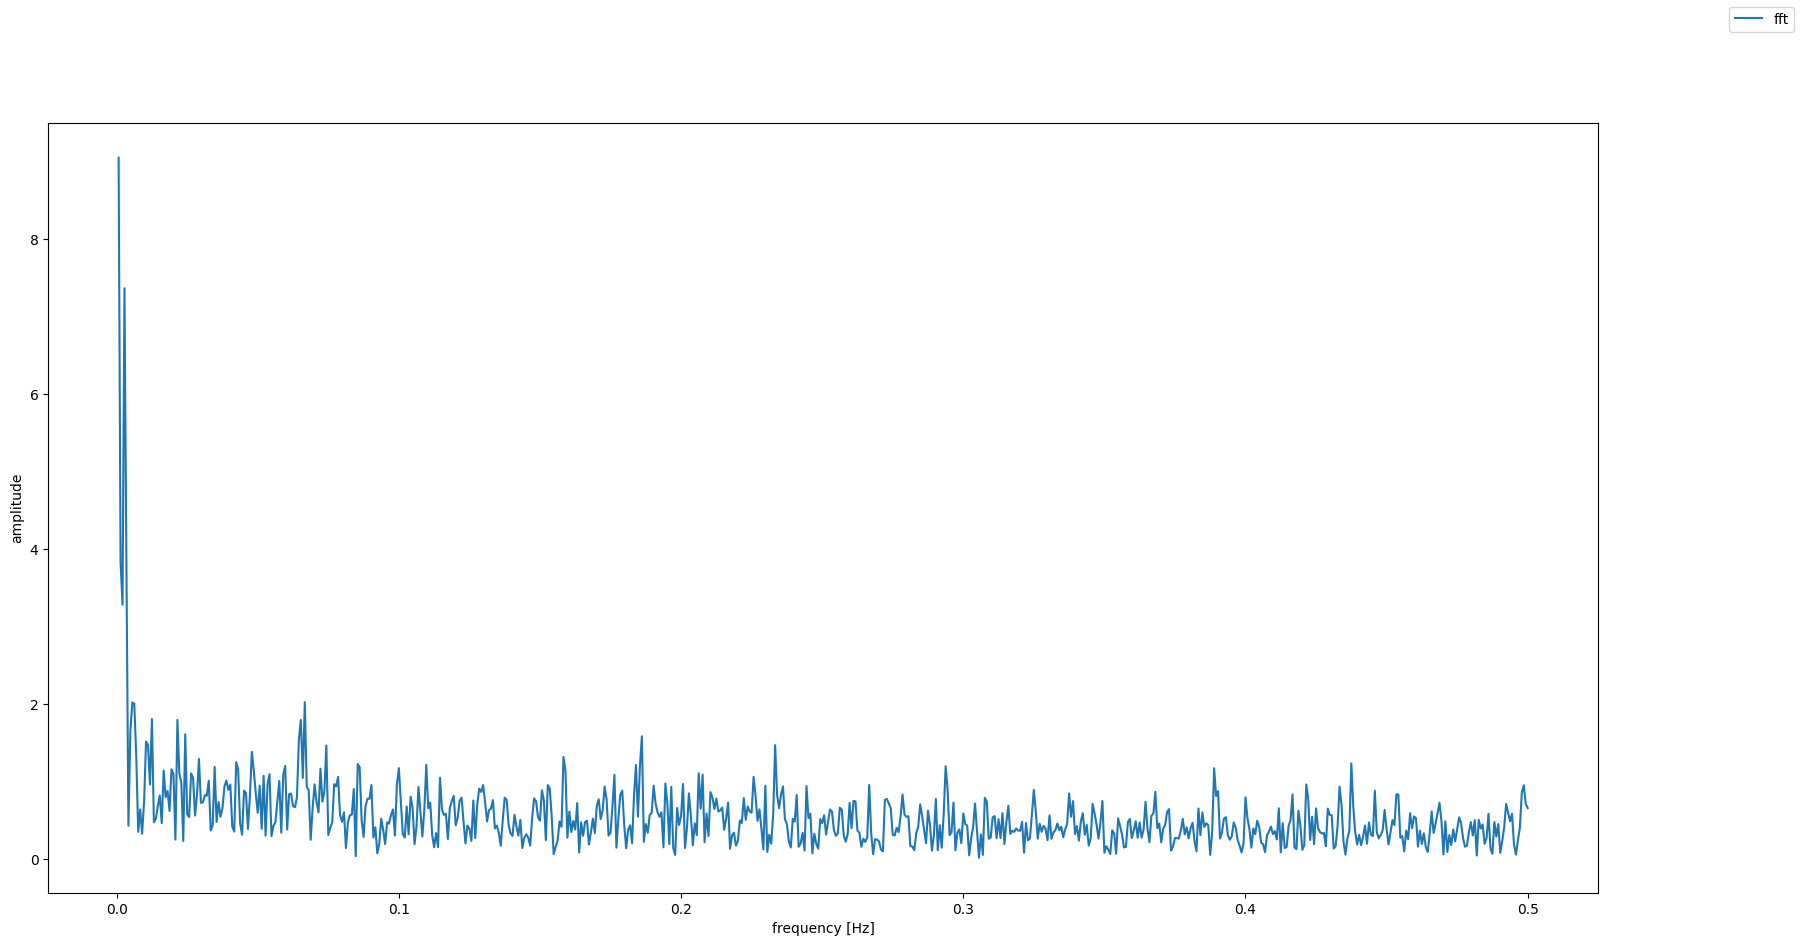

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
plot_fourier_transform(min_timeline["avgMemory"], ax)
fig.legend()
plt.show()


/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_11858/2035990528.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


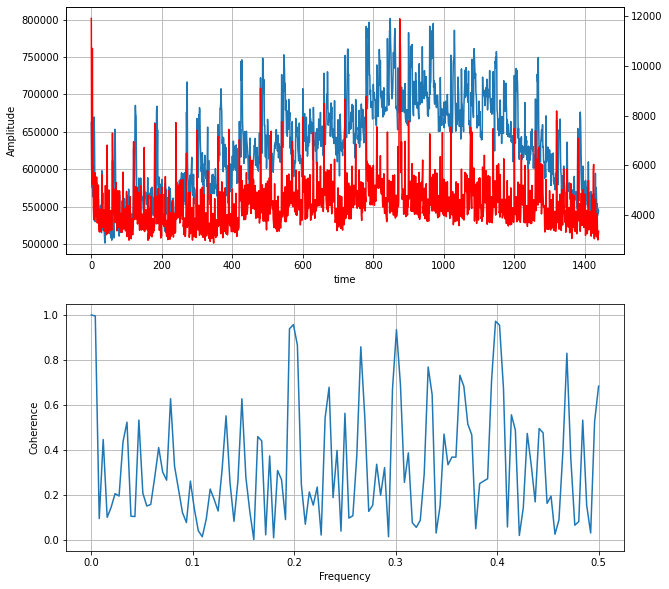

In [15]:
inv = pd.read_csv("../../data/azure/invocations_per_function_md.anon.d01.csv")
inv = inv.loc[:, [str(n) for n in range (1, 1441)]]
inv = inv.sum(axis='rows').to_numpy()
fig = plot_coherence(inv, min_timeline["numInvocatonsThisMinute"].to_numpy(), figsize=(10, 10))
fig.show()